In [1]:
import ipynb_import
import DRS
import numpy as np
import pandas as pd
import Segmental_DTW

importing Jupyter notebook from DRS.ipynb


/usr/local/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


importing Jupyter notebook from Segmental_DTW.ipynb


In [2]:
data=pd.read_csv("26HUVLQKM4L1_20181114.csv",encoding="utf-8",verbose=True)

Tokenization took: 45.24 ms
Type conversion took: 56.65 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 11.39 ms
Type conversion took: 16.83 ms
Parser memory cleanup took: 0.00 ms


In [3]:
data.head()

,Unnamed: 0,EPP,Eabc,Ia,Ib,Ic,Uab,Uca,Ubc,IdAddr,TimeStr
0,0,1617.3,2.6,3.0,2.1,2.7,386.7,385.3,384.5,26HUVLQKM4L1,2018-11-14 00:00:00
1,1,1617.3,2.6,3.0,2.1,2.7,387.1,385.7,384.8,26HUVLQKM4L1,2018-11-14 00:00:01
2,2,1617.3,2.6,3.0,2.1,2.7,387.1,385.7,384.8,26HUVLQKM4L1,2018-11-14 00:00:02
3,3,1617.3,2.5,2.7,2.1,2.7,387.1,385.7,384.8,26HUVLQKM4L1,2018-11-14 00:00:03
4,4,1617.3,2.5,2.7,2.1,2.7,386.7,385.3,384.5,26HUVLQKM4L1,2018-11-14 00:00:04


In [4]:
data=data.loc[:,["TimeStr","Ia"]]
data.head()

,TimeStr,Ia
0,2018-11-14 00:00:00,3.0
1,2018-11-14 00:00:01,3.0
2,2018-11-14 00:00:02,3.0
3,2018-11-14 00:00:03,2.7
4,2018-11-14 00:00:04,2.7


In [5]:
def t(time):
    return time[0:16]
q=list(map(t,data["TimeStr"])   ) 

In [6]:
data["TimeStr"]=q

In [7]:
data=data.groupby(["TimeStr"]).mean().reset_index()

In [8]:
data.shape

(1441, 2)

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plt.plot(data.Ia)

In [10]:
len(data.Ia)

1441

In [11]:
pattern=Segmental_DTW.S_DTW_trim(data.Ia,data.Ia,w=10,overlap=8,L=10)

/usr/local/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
DRS.ipynb:12: RuntimeWarning: invalid value encountered in double_scalars
  },


[   first  second
0      0      10
1      1      11
2      3      13
3      4      14
4      5      15
5      6      16
6      7      17
7      8      18
8      2      19,    first  second
0      0      10
1      2      12
2      3      13
3      5      15
4      6      16
5      7      17
6      8      18
7      9      19
8     10      20
9      1      21,     first  second
0       0      10
1       1      11
2       4      14
3       5      15
4       7      17
5       8      18
6       9      19
7      10      20
8      11      21
9      12      22
10      2      23,     first  second
0       0      10
1       3      13
2       6      16
3       7      17
4       9      19
5      10      20
6      11      21
7      12      22
8      13      23
9      14      24
10      1      25,     first  second
0       0      10
1       1      11
2       5      15
3       8      18
4       9      19
5      11      21
6      12      22
7      13      23
8      14      24
9      15      25
10     1

In [12]:
p=pd.DataFrame(pattern)
#p=p[(p['count']>10)]

In [13]:
p.shape
import time

In [ ]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

t1=time.time()
import itertools
i=list(range(p.shape[0]))
j=list(range(p.shape[0]))
ij=list(itertools.product(i,j))
def dtw_dis(index):
    distance, path = fastdtw(data.Ia[np.array(p)[index[0]][0]:(np.array(p)[index[0]][1]+1)],
                                 data.Ia[np.array(p)[index[1]][0]:(np.array(p)[index[1]][1]+1)] , dist=euclidean)
    return distance
list(map(dtw_dis,ij))
time.time()-t1

In [ ]:
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
dis_julei=np.zeros((p.shape[0],p.shape[0]))

for i in range(p.shape[0]):
    
    for j in range(i+1,p.shape[0],1):
        distance, path = fastdtw(data.Ia[np.array(p)[i][0]:(np.array(p)[i][1]+1)],
                                 data.Ia[np.array(p)[j][0]:(np.array(p)[j][1]+1)] , dist=euclidean)
        dis_julei[i,j]=(distance)
    print(i)

In [ ]:
dis_julei=dis_julei.T+dis_julei

In [ ]:
pd.DataFrame(dis_julei).to_csv("corr_Ia.csv")

In [69]:
low=pd.read_csv("第一类_Ia.csv")
up=pd.read_csv("第二类_Ia.csv")
up_=pd.read_csv("第三类_Ia.csv")
up__=pd.read_csv("第四类_Ia.csv")
#up___=pd.read_csv("第五类_Ia.csv")

In [54]:
p.iloc[low.x,:].head()

,first,second,count
0,0,30,701
1,1,32,2
2,1,33,1
3,1,34,2
4,1,35,6


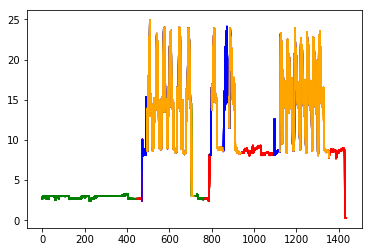

In [70]:
for i in range(p.iloc[low.x,:].shape[0]):
    plt.plot(data.Ia[np.array(p.iloc[low.x,:])[i][0]:np.array(p.iloc[low.x,:])[i][1]]
            ,color='green')

for i in range(p.iloc[up.x,:].shape[0]):
    plt.plot(data.Ia[np.array(p.iloc[up.x,:])[i][0]:np.array(p.iloc[up.x,:])[i][1]]
            ,color='red')
for i in range(p.iloc[up_.x,:].shape[0]):
    plt.plot(data.Ia[np.array(p.iloc[up_.x,:])[i][0]:np.array(p.iloc[up_.x,:])[i][1]]
            ,color="blue")
for i in range(p.iloc[up__.x,:].shape[0]):
    plt.plot(data.Ia[np.array(p.iloc[up__.x,:])[i][0]:np.array(p.iloc[up__.x,:])[i][1]]
            ,color='orange')
#for i in range(p.iloc[up___.x,:].shape[0]):
#    plt.plot(data.Ia[np.array(p.iloc[up___.x,:])[i][0]:np.array(p.iloc[up___.x,:])[i][1]]
#            ,color='black')          
plt.show()